In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DataDictionaryWiDS2021.csv")

In [5]:
df['Category'].value_counts()

labs                  60
vitals                52
APACHE covariate      28
labs blood gas        16
demographic           15
APACHE comorbidity     7
identifier             2
Target Variable        1
Name: Category, dtype: int64

In [14]:
lbg = df.loc[df['Category']=='labs blood gas']

In [30]:
pd.set_option('max_colwidth',200)

In [32]:
print(lbg['Description'])

157    The highest arterial partial pressure of carbon dioxide for the patient during the first 24 hours of their unit stay
158     The lowest arterial partial pressure of carbon dioxide for the patient during the first 24 hours of their unit stay
159                                    The highest arterial pH for the patient during the first 24 hours of their unit stay
160                                     The lowest arterial pH for the patient during the first 24 hours of their unit stay
161            The highest arterial partial pressure of oxygen for the patient during the first 24 hours of their unit stay
162             The lowest arterial partial pressure of oxygen for the patient during the first 24 hours of their unit stay
163                    The highest fraction of inspired oxygen for the patient during the first 24 hours of their unit stay
164                     The lowest fraction of inspired oxygen for the patient during the first 24 hours of their unit stay
165     

In [40]:
#The highest arterial partial pressure of carbon dioxide for the patient during the first 24 hours of their unit stay
#患者在其住院期间的最初24小时内的最高动脉二氧化碳分压
#The highest fraction of inspired oxygen for the patient during the first 24 hours of their unit stay
#在患者住院的最初24小时内，吸入氧气的比例最高

In [41]:
dic = {'d1': 'first day', 'h1' : 'first hour', 'arterial_pco2': 'arterial partial pressure of CO2' , \
       'arterial_ph':'arterial ph', 'arterial_po2':'arterial partial pressure of O2','pao2fio2ratio':'fraction of inspired oxygen'} 

In [43]:
dic

{'d1': 'first day',
 'h1': 'first hour',
 'arterial_pco2': 'arterial partial pressure of CO2',
 'arterial_ph': 'arterial ph',
 'arterial_po2': 'arterial partial pressure of O2',
 'pao2fio2ratio': 'fraction of inspired oxygen'}

In [72]:
data = pd.read_csv("TrainingWiDS2021.csv")

In [73]:
tt = lbg['Variable Name'].to_list()

In [74]:
data0 = data.loc[:,tt]

In [77]:
data0.dropna(
          axis=0, # axis=0表示删除行；
          how='all', # how=any表示若任一列出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )

In [90]:
data0.describe()

d1_arterial_pco2_max  d1_arterial_pco2_min  d1_arterial_ph_max  \
count          45696.000000          45696.000000        45350.000000   
mean              45.341451             38.535587            7.387687   
std               14.623775             10.996254            0.085651   
min               18.400000             14.900000            7.054280   
25%               36.200000             32.000000            7.340000   
50%               42.900000             37.000000            7.390000   
75%               50.000000             43.000000            7.440000   
max              111.000000             85.912000            7.620000   

       d1_arterial_ph_min  d1_arterial_po2_max  d1_arterial_po2_min  \
count        45350.000000         46147.000000         46147.000000   
mean             7.322903           165.003814           102.957476   
std              0.111530           107.084058            61.514357   
min              6.890000            39.000000            28.000000   
25%              7.270000            88.000000            68.000000   
50%              7.340000           127.000000            85.000000   
75%              7.398000           206.000000           116.250000   
max              7.557860           540.865000           448.892000   

       d1_pao2fio2ratio_max  d1_pao2fio2ratio_min  h1_arterial_pco2_max  \
count          36818.000000          36818.000000          22491.000000   
mean             287.600071            224.005403             44.552966   
std              130.319620            119.119675             14.631359   
min               54.800000             36.000000             15.000000   
25%              192.205556            132.000000             36.000000   
50%              275.000000            205.000000             42.000000   
75%              370.000000            300.000000             49.000000   
max              834.805000            604.227778            111.505000   

       h1_arterial_pco2_min  h1_arterial_ph_max  h1_arterial_ph_min  \
count          22491.000000        22308.000000        22308.000000   
mean              43.341081            7.337283            7.327771   
std               14.052015            0.105930            0.108658   
min               14.997000            6.930000            6.900000   
25%               35.000000            7.290000            7.280000   
50%               41.000000            7.350000            7.340000   
75%               48.000000            7.408000            7.400000   
max              107.000000            7.570000            7.563000   

       h1_arterial_po2_max  h1_arterial_po2_min  h1_pao2fio2ratio_max  \
count         22712.000000         22712.000000          16760.000000   
mean            163.035835           145.949537            247.525419   
std             112.646743           100.211935            131.440167   
min              34.000000            31.000000             42.000000   
25%              80.000000            77.000000            144.000000   
50%             119.900000           108.000000            228.125000   
75%             214.000000           182.000000            333.000000   
max             534.905000           514.905000            720.000000   

       h1_pao2fio2ratio_min  
count          16760.000000  
mean             239.617358  
std              128.562211  
min               38.000000  
25%              138.000000  
50%              218.750000  
75%              324.000000  
max              654.813793

In [82]:
data0.corr()

d1_arterial_pco2_max  d1_arterial_pco2_min  \
d1_arterial_pco2_max              1.000000              0.717686   
d1_arterial_pco2_min              0.717686              1.000000   
d1_arterial_ph_max               -0.204933             -0.349543   
d1_arterial_ph_min               -0.460902             -0.093565   
d1_arterial_po2_max               0.032404             -0.180447   
d1_arterial_po2_min              -0.183469             -0.040865   
d1_pao2fio2ratio_max             -0.181386             -0.257915   
d1_pao2fio2ratio_min             -0.313269             -0.139904   
h1_arterial_pco2_max              0.914473              0.718703   
h1_arterial_pco2_min              0.872374              0.753056   
h1_arterial_ph_max               -0.407966             -0.177394   
h1_arterial_ph_min               -0.446080             -0.154834   
h1_arterial_po2_max              -0.068186             -0.142515   
h1_arterial_po2_min              -0.105832             -0.121876   
h1_pao2fio2ratio_max             -0.220171             -0.163459   
h1_pao2fio2ratio_min             -0.248521             -0.155614   

                      d1_arterial_ph_max  d1_arterial_ph_min  \
d1_arterial_pco2_max           -0.204933           -0.460902   
d1_arterial_pco2_min           -0.349543           -0.093565   
d1_arterial_ph_max              1.000000            0.602755   
d1_arterial_ph_min              0.602755            1.000000   
d1_arterial_po2_max             0.111895           -0.155187   
d1_arterial_po2_min            -0.023193            0.147351   
d1_pao2fio2ratio_max            0.137706            0.037824   
d1_pao2fio2ratio_min            0.056414            0.263821   
h1_arterial_pco2_max           -0.211334           -0.386390   
h1_arterial_pco2_min           -0.233961           -0.338932   
h1_arterial_ph_max              0.605182            0.842108   
h1_arterial_ph_min              0.574228            0.895144   
h1_arterial_po2_max             0.113190            0.004577   
h1_arterial_po2_min             0.078980            0.039635   
h1_pao2fio2ratio_max            0.066341            0.123808   
h1_pao2fio2ratio_min            0.057123            0.157256   

                      d1_arterial_po2_max  d1_arterial_po2_min  \
d1_arterial_pco2_max             0.032404            -0.183469   
d1_arterial_pco2_min            -0.180447            -0.040865   
d1_arterial_ph_max               0.111895            -0.023193   
d1_arterial_ph_min              -0.155187             0.147351   
d1_arterial_po2_max              1.000000             0.477973   
d1_arterial_po2_min              0.477973             1.000000   
d1_pao2fio2ratio_max             0.562616             0.437622   
d1_pao2fio2ratio_min             0.273921             0.615977   
h1_arterial_pco2_max            -0.041564            -0.148921   
h1_arterial_pco2_min            -0.096602            -0.133873   
h1_arterial_ph_max               0.032221             0.104089   
h1_arterial_ph_min              -0.032364             0.120035   
h1_arterial_po2_max              0.878929             0.511893   
h1_arterial_po2_min              0.767943             0.601506   
h1_pao2fio2ratio_max             0.510521             0.489962   
h1_pao2fio2ratio_min             0.463843             0.516279   

                      d1_pao2fio2ratio_max  d1_pao2fio2ratio_min  \
d1_arterial_pco2_max             -0.181386             -0.313269   
d1_arterial_pco2_min             -0.257915             -0.139904   
d1_arterial_ph_max                0.137706              0.056414   
d1_arterial_ph_min                0.037824              0.263821   
d1_arterial_po2_max               0.562616              0.273921   
d1_arterial_po2_min               0.437622              0.615977   
d1_pao2fio2ratio_max              1.000000              0.730557   
d1_pao2fio2ratio_min              0.730557              1.000000   
h1_arterial_pco2_max             -0.19452

In [85]:
import seaborn as sns

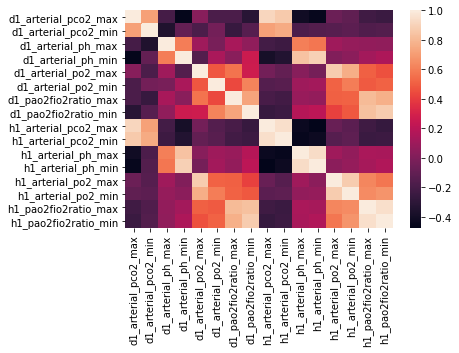

In [87]:
sns.heatmap(data0.corr())